In [35]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

#Load the csv file
df = pd.read_csv('/Users/mamathashetty/LendingClubCaseStudy/loan.csv')

#print the head 
print(df.head())


        id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   
3   13.49%       339.31     C        C1  ...                NaN   
4   12.69%        67.79     B        B5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0                NaN            NaN               

/Users/mamathashetty/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Drop the irrelevant columns from column no 49 i.e collections_12_mths_ex_med. All of the remaining columns are either having Null or NA or only few records have values, which cannot be used for analysis.

In [36]:
df.drop(df.columns[49:], axis='columns', inplace=True)
#drop payment, url column
#employee length - treat n/a

In [62]:
import seaborn as sns

In [38]:
df['loan_status']

0         Fully Paid
1        Charged Off
2         Fully Paid
3         Fully Paid
4            Current
            ...     
39712     Fully Paid
39713     Fully Paid
39714     Fully Paid
39715     Fully Paid
39716     Fully Paid
Name: loan_status, Length: 39717, dtype: object

In [39]:
#Convert the column value to 1 or 0 i.e if Charged off then value is 1 else 0. This will help us to do analysis in better way as well as to plot the graphs
df['loan_status'] = df['loan_status'].apply(lambda x: 1 if (x == 'Charged Off') else 0)

In [81]:
def handle(code):
        if code == 200:
            print('success')
        elif code == 404:
            print('not found')
        
handle(200)

success


In [78]:
def handle(code):
    match code:
        case 200:
            print('success')
        case 404:
            print('not found')
        case _:
            print('unknown')
handle(400)

def purpose_new(x1):
    match x1:
        case "debt_consolidation":
            return "dc"
        case 'other':
            return 'oth'
        case 'credit_card':
            return 'cc'
        case 'small_business':        
            return 'sb'
        case 'home_improvement':        
            return 'hi'
        case 'major_purchase':
            return 'mp'
        case 'car':
            return 'car'
        case 'medical':
            return 'med'
        case 'wedding':        
            return 'wed'
        case 'house':        
            return 'home'
        case 'educational':
            return 'edu'
        case 'vacation':        
            return 'vac'
        case 'renewable_energy':        
            return 're'

df['purpose_new'] = df['purpose'].apply(lambda x: purpose_new(x))

                                              

SyntaxError: invalid syntax (<ipython-input-78-1e06e9896ae1>, line 2)

In [97]:
def purpose_new(x):
        if  x == "debt_consolidation":
            return "dc"
        elif x =='other':
            return 'oth'
        elif x =='credit_card':
            return 'cc'
        elif x =='small_business':        
            return 'sb'
        elif x =='home_improvement':        
            return 'hi'
        elif x =='major_purchase':
            return 'mp'
        elif x =='car':
            return 'car'
        elif x =='medical':
            return 'med'
        elif x =='wedding':        
            return 'wed'
        elif x =='house':        
            return 'home'
        elif x =='educational':
            return 'edu'
        elif x =='vacation':        
            return 'vac'
        elif x =='renewable_energy':        
            return 're'
        else:
            return 'NA'

df['purpose_new'] = df['purpose'].apply(lambda x: purpose_new(x))

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 50 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term                     39717 non-null  object 
 6   int_rate                 39717 non-null  object 
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  emp_title                37258 non-null  object 
 11  emp_length               38642 non-null  object 
 12  home_ownership           39717 non-null  object 
 13  annual_inc               39717 non-null  float64
 14  verification_status   

In [ ]:
#1. Univariate Analysis on verification_status
df_verification = df.groupby('verification_status').sum()
df_verification = df_verification.sort_values(by=['loan_status'], ascending=False)
print(df_verification['loan_status'])

#Conclusion - This details are not enough to make any conclusion, since total number of charged off customers are spread evenly 
# on almost all types of verification status

In [52]:
#2. Univariate Analysis on purpose
df_verification = df.groupby('purpose').sum()
df_verification = df_verification.sort_values(by=['loan_status'], ascending=False)
print(df_verification['loan_status'])

#Conclusion - This result gives us information that, customers who have taken loan for debt_consolidation, are mostly likely to be defaulters

purpose
debt_consolidation    2767
other                  633
credit_card            542
small_business         475
home_improvement       347
major_purchase         222
car                    160
medical                106
wedding                 96
moving                  92
house                   59
educational             56
vacation                53
renewable_energy        19
Name: loan_status, dtype: int64


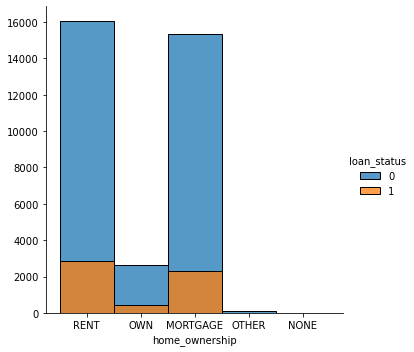

In [101]:
sns.FacetGrid(df, hue='loan_status', height=5).map(sns.histplot,"home_ownership").add_legend()

In [56]:
#3. Univariate Analysis on verification_status
df_verification = df.groupby('home_ownership').sum()
df_verification = df_verification.sort_values(by=['loan_status'], ascending=False)
print(df_verification['loan_status'])

#Conclusion - This analysis gives us information that customers with Home ownership as Rent,Mortgage are more likely to be defaulters.

home_ownership
RENT        2839
MORTGAGE    2327
OWN          443
OTHER         18
NONE           0
Name: loan_status, dtype: int64


In [61]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 49 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term                     39717 non-null  object 
 6   int_rate                 39717 non-null  object 
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  emp_title                37258 non-null  object 
 11  emp_length               38642 non-null  object 
 12  home_ownership           39717 non-null  object 
 13  annual_inc               39717 non-null  float64
 14  verification_status   

In [82]:
def handle(code):
    match code:
        case 200:
            print('success')
        case 404:
            print('not found')
        case _:
            print('unknown')
handle(400)

SyntaxError: invalid syntax (<ipython-input-82-797bf804f582>, line 2)

In [59]:
#Set LoanStatus = 1 if Charged off 
#get the total charged off customers based on the Verification staus
#df['loan_status'] = df['loan_status'].apply(lambda x: 1 if (x == 'Charged Off') else 0)
df_verification = df.groupby('grade').sum()
df_verification = df_verification.sort_values(by=['loan_status'], ascending=False)
print(df_verification['loan_status'])

#With the result, this cannot be used as a decision making factor since there are 50-50 chances in 

grade
B    1425
C    1347
D    1118
E     715
A     602
F     319
G     101
Name: loan_status, dtype: int64
